In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, ValidationCurveDisplay

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cholesterol_prediction.csv',sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
y=data['cardio']
X=data.drop(columns=['id','cardio'])

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, n_jobs=-1, random_state=42)

In [11]:
param_range = np.arange(2, 50, 2)

train_scores, test_scores = validation_curve(rf, X, y, param_name="n_estimators", param_range=param_range, n_jobs=None, cv=10, scoring="accuracy")

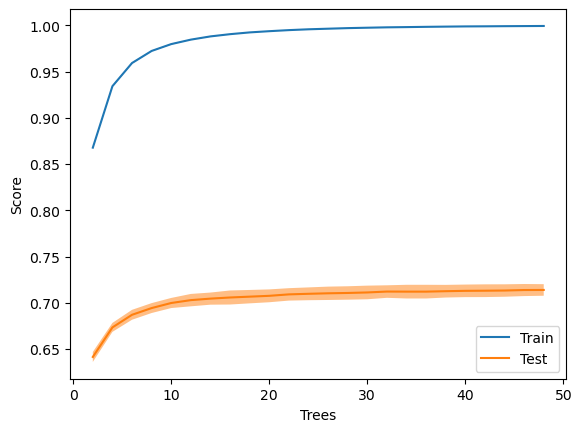

In [12]:
# param_name = 'Trees'
display = ValidationCurveDisplay( param_name='Trees', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="Score" )
display.plot()